In [88]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import calendar
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel
import keras

pd.options.display.max_columns = None
pd.options.display.max_rows = None

warnings.filterwarnings('ignore')

os.chdir("E:/Trinity/Dissertation/Sem 3/models/data/")

Read the new DataFrame

In [89]:
os.chdir("E:/Trinity/Dissertation/Sem 3/models/")
df = pd.read_csv("MoreCategoriesData.csv")  

In [90]:
df.head()

,Date,StartTime,EndTime,No_of_Cars,DayOfWeek,Weekend?,isHoliday?,Month,Day,Year,Tolls,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6,ScaledStartTime,ScaledDayofWeek,TrafficCategory
0,01-01-2019,0,1,22,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.661325,-0.974781,1
1,01-01-2019,1,2,29,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.516862,-0.974781,1
2,01-01-2019,2,3,25,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.372399,-0.974781,1
3,01-01-2019,3,4,31,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.227936,-0.974781,1
4,01-01-2019,4,5,24,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.083473,-0.974781,1


In [91]:
# Quartiles
tolls = df["Tolls"].unique()
for toll in tolls:
    print(toll)
    quants = df[df["Tolls"] == toll]["No_of_Cars"].quantile([0.25, 0.50, 0.75])
    print(quants)
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]<=quants[0.25]),"TrafficCategory"] = 1
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>quants[0.25]) & (df["No_of_Cars"]<=quants[0.50]),"TrafficCategory"] = 2
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>quants[0.50]) & (df["No_of_Cars"]<=quants[0.75]),"TrafficCategory"] = 3
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>quants[0.75]),"TrafficCategory"] = 4

M7-M8
0.25    100.0
0.50    499.0
0.75    800.0
Name: No_of_Cars, dtype: float64
N6
0.25     40.0
0.50    248.0
0.75    421.0
Name: No_of_Cars, dtype: float64
N25
0.25     16.0
0.50    129.0
0.75    300.0
Name: No_of_Cars, dtype: float64
M50
0.25     274.0
0.50    1252.5
0.75    3014.0
Name: No_of_Cars, dtype: float64
M1
0.25     122.00
0.50     758.50
0.75    1420.25
Name: No_of_Cars, dtype: float64
M8
0.25      0.0
0.50     78.0
0.75    491.0
Name: No_of_Cars, dtype: float64
M3
0.25      82.0
0.50     637.5
0.75    1256.0
Name: No_of_Cars, dtype: float64
Eastlink
0.25     57.0
0.50    417.0
0.75    839.0
Name: No_of_Cars, dtype: float64
M4
0.25      76.0
0.50     445.5
0.75    1008.0
Name: No_of_Cars, dtype: float64
--
0.25    0.0
0.50    0.0
0.75    0.0
Name: No_of_Cars, dtype: float64
Dublin Tunnel
0.25      0.0
0.50     80.0
0.75    367.0
Name: No_of_Cars, dtype: float64
Limerick Tunnel
0.25      0.0
0.50     37.0
0.75    398.0
Name: No_of_Cars, dtype: float64


### OR

In [4]:
# Plain Division
tolls = df["Tolls"].unique()
for toll in tolls:
    print(toll)
    maxCars = df[df["Tolls"] == toll]["No_of_Cars"].max()
    minCars = df[df["Tolls"] == toll]["No_of_Cars"].min()
    rangeCars = (maxCars - minCars)/4
    
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]<=(minCars+rangeCars)),"TrafficCategory"] = 1
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>(minCars+rangeCars)) & (df["No_of_Cars"]<=(minCars+2*rangeCars)),"TrafficCategory"] = 2
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>(minCars+2*rangeCars)) & (df["No_of_Cars"]<=(minCars+3*rangeCars)),"TrafficCategory"] = 3
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>(minCars+3*rangeCars)),"TrafficCategory"] = 4

M7-M8
N6
N25
M50
M1
M8
M3
Eastlink
M4
--
Dublin Tunnel


KeyboardInterrupt: 

In [92]:
tolls = df["Tolls"].unique()
for toll in tolls:
    print(toll)
    print(df[df["Tolls"]==toll]["TrafficCategory"].value_counts())

M7-M8
1    2176
3    2173
2    2170
4    2169
Name: TrafficCategory, dtype: int64
N6
1    2234
3    2198
4    2169
2    2135
Name: TrafficCategory, dtype: int64
N25
1    2215
3    2179
4    2166
2    2152
Name: TrafficCategory, dtype: int64
M50
1    2193
3    2191
4    2189
2    2187
Name: TrafficCategory, dtype: int64
M1
1    2054
4    2052
3    2052
2    2050
Name: TrafficCategory, dtype: int64
M8
1    1814
3    1672
4    1669
2    1541
Name: TrafficCategory, dtype: int64
M3
3    2139
1    2138
2    2134
4    2133
Name: TrafficCategory, dtype: int64
Eastlink
1    2192
4    2177
2    2172
3    2171
Name: TrafficCategory, dtype: int64
M4
1    2204
3    2187
4    2181
2    2164
Name: TrafficCategory, dtype: int64
--
1    1244
4     124
Name: TrafficCategory, dtype: int64
Dublin Tunnel
1    2620
4    2171
3    2162
2    1735
Name: TrafficCategory, dtype: int64
Limerick Tunnel
1    2892
4    2133
3    2118
2    1401
Name: TrafficCategory, dtype: int64


### MODEL

In [101]:
df = df[:90888]

In [102]:

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

df_x = df.drop(["Date","StartTime","EndTime","No_of_Cars","DayOfWeek","Weekend?","Year", "Tolls","TrafficCategory"],axis=1)
df_y = df["TrafficCategory"]

encoder = LabelEncoder()
encoder.fit(df_y)
df_y = encoder.transform(df_y)
df_y = keras.utils.to_categorical(df_y)

In [104]:
df_x.head()

,isHoliday?,Month,Day,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6,ScaledStartTime,ScaledDayofWeek
0,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.661325,-0.974781
1,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.516862,-0.974781
2,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.372399,-0.974781
3,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.227936,-0.974781
4,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.083473,-0.974781


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.80, random_state=46)

In [114]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(72710, 16)
(72710, 4)
(18178, 16)
(18178, 4)


In [115]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [116]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.14.0


In [234]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(16, activation='relu'),
        #layers.Dropout(0.4),
        layers.Dense(4, activation='softmax')
    ])
    epochs = 100
    learning_rate = 0.001
    decay_rate = learning_rate / epochs
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    #opt = keras.optimizers.SGD(learning_rate=0.001)
    #opt = keras.optimizers.RMSprop(learning_rate=learning_rate, decay=decay_rate) #momentum=momentum

    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    return model

In [235]:
model = build_model()

In [236]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 64)                1088      
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_125 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_127 (Dense)            (None, 4)                 68        
Total params: 6,356
Trainable params: 6,356
Non-trainable params: 0
___________________________________________________

In [238]:
EPOCHS = 100
early_stop = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10)

history4 = model.fit(  x_train.values, y_train,# batch_size=10,
                      epochs=EPOCHS, 
                      #validation_split = 0.20, 
                      verbose=1,
                      callbacks=[early_stop],
                      validation_data=(x_test.values, y_test)
                   )

Train on 72710 samples, validate on 18178 samples
Epoch 1/100
72710/72710 [==============================] - 9s 127us/sample - loss: 0.4891 - acc: 0.8085 - val_loss: 0.3703 - val_acc: 0.8602
Epoch 2/100
72710/72710 [==============================] - 10s 132us/sample - loss: 0.4843 - acc: 0.8098 - val_loss: 0.3703 - val_acc: 0.8632
Epoch 3/100
72710/72710 [==============================] - 10s 133us/sample - loss: 0.4874 - acc: 0.8090 - val_loss: 0.3752 - val_acc: 0.8600
Epoch 4/100
72710/72710 [==============================] - 10s 133us/sample - loss: 0.4845 - acc: 0.8085 - val_loss: 0.3774 - val_acc: 0.8533
Epoch 5/100
72710/72710 [==============================] - 10s 132us/sample - loss: 0.4842 - acc: 0.8076 - val_loss: 0.3683 - val_acc: 0.8594
Epoch 6/100
72710/72710 [==============================] - 10s 132us/sample - loss: 0.4773 - acc: 0.8120 - val_loss: 0.3670 - val_acc: 0.8627
Epoch 7/100
72710/72710 [==============================] - 10s 131us/sample - loss: 0.4784 - acc: 0

72710/72710 [==============================] - 9s 129us/sample - loss: 0.4473 - acc: 0.8295 - val_loss: 0.3609 - val_acc: 0.8594
Epoch 59/100
72710/72710 [==============================] - 9s 129us/sample - loss: 0.4497 - acc: 0.8275 - val_loss: 0.3515 - val_acc: 0.8621
Epoch 60/100
72710/72710 [==============================] - 9s 129us/sample - loss: 0.4486 - acc: 0.8276 - val_loss: 0.3643 - val_acc: 0.8576
Epoch 61/100
72710/72710 [==============================] - 9s 129us/sample - loss: 0.4501 - acc: 0.8274 - val_loss: 0.3495 - val_acc: 0.8643
Epoch 62/100
72710/72710 [==============================] - 9s 130us/sample - loss: 0.4482 - acc: 0.8272 - val_loss: 0.3560 - val_acc: 0.8615
Epoch 63/100
72710/72710 [==============================] - 9s 128us/sample - loss: 0.4476 - acc: 0.8283 - val_loss: 0.3591 - val_acc: 0.8648
Epoch 64/100
72710/72710 [==============================] - 9s 130us/sample - loss: 0.4506 - acc: 0.8271 - val_loss: 0.3588 - val_acc: 0.8606
Epoch 65/100
72710/

In [239]:
model.evaluate(x_test, y_test)[1] * 100 

#ADAM - [1.4546287528548152, 0.87398696]
#SGD - [0.3713060300172692, 0.8699613]
#RMSprop - [0.34412862702953945, 0.8800784](0.01) [0.34108348866976246, 0.87976056](0.005)

#history 1 - rmsprop
#history 2 - adam 001
#history 3 - sgd
#history 4 - adam 005 




# 64 64 64 4 - 90.22374749183655
# 128 64 64 4 - 90.13899564743042
# 64 32 16 4 - 90.13475775718689
# 64 64 16 4 - 90.71107506752014
# 64 64 8 4 - 90.03729224205017
# 64 64 4 4 - 90.76616764068604

18178/18178 [==============================] - 1s 71us/sample - loss: 0.3551 - acc: 0.8620


86.20310425758362

In [176]:
## Save the model

# serialize to JSON
json_file = model.to_json()
with open("DeepLearningModels/modelCat4.json", "w") as file:
    file.write(json_file)
# serialize weights to HDF5
model.save_weights("DeepLearningModels/modelCat4.h5")

In [144]:
ypred = np.round(model.predict(x_test))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
print(accuracy_score(ypred, y_test)*100)

87.11629442182858


In [112]:
results

array([0.86334747, 0.86493641, 0.86004871, 0.86788857, 0.8658756 ,
       0.8604725 , 0.86280328, 0.8589893 , 0.8673588 , 0.87202036])

In [90]:
ypred = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
print(accuracy_score(ypred, y_test))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets

In [230]:
hist4 = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch
hist4 #.tail()

,loss,acc,val_loss,val_acc,epoch
0,1.552096,0.254834,1.389258,0.248157,0
1,1.414389,0.256168,1.516683,0.230443,1
2,1.416765,0.254284,1.420956,0.249367,2
3,1.418341,0.253019,1.394098,0.272032,3
4,1.416774,0.252991,1.471777,0.248157,4
5,1.416835,0.251657,1.399768,0.248157,5
6,1.414940,0.255384,1.428249,0.248157,6
7,1.415299,0.255123,1.398231,0.248157,7
8,1.414572,0.253638,1.391058,0.272032,8
9,1.415264,0.254037,1.411350,0.230443,9


In [249]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=0)

In [247]:
print(hist.acc.max())
print(hist.acc.min())

0.8453582525253296
0.4073992669582367


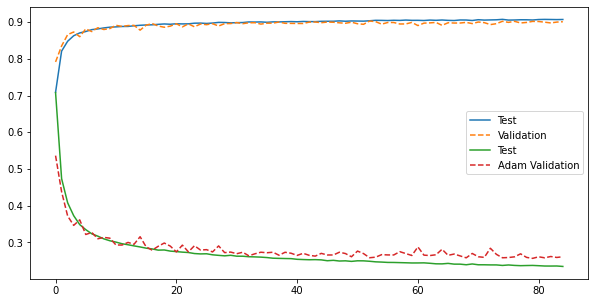

In [258]:
plt.figure(figsize=(10,5))
#plt.plot(hist1["acc"], label="RMSProp Test")
#plt.plot(hist1["val_acc"], linestyle='dashed', label="RMSProp Validation")

plt.plot(hist2["acc"], label="Test")
plt.plot(hist2["val_acc"], linestyle='dashed', label="Validation")
plt.plot(hist2["loss"], label="Test")
plt.plot(hist2["val_loss"], linestyle='dashed', label="Adam Validation")

#plt.plot(hist3["acc"], label="SGD Test")
#plt.plot(hist3["val_acc"], linestyle='dashed', label="SGD Validation")

#plt.plot(hist3["acc"], label="SGD LR-0.001")
#plt.plot(hist4["acc"], label="Adam LR-0.005")


#plt.plot(data[0].head(500), label="Predicted")
plt.legend(loc="bottom right")
plt.show()

Text(0, 0.5, 'Accuracy')

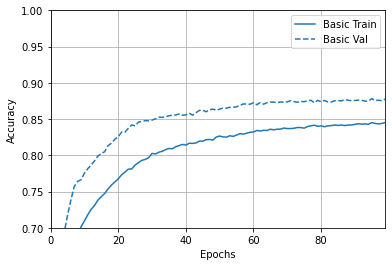

In [250]:
plotter.plot({'Basic': history}, metric = "acc")
plt.ylim([0.7, 1])
plt.ylabel('Accuracy')

In [ ]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

In [ ]:
ypred = model.predict(x_test)

In [145]:
data = pd.DataFrame(ypred, y_test).reset_index()

ValueError: Index data must be 1-dimensional

In [146]:
plt.figure(figsize=(20,8))
plt.plot(data["No_of_Cars"].head(100), label="Actual")
plt.plot(data[0].head(100), label="Predicted")
plt.legend(loc="upper right")
plt.show()

NameError: name 'data' is not defined

<Figure size 1440x576 with 0 Axes>

In [ ]:
test = pd.DataFrame(y_test)
pred = pd.DataFrame(ypred)
final = pd.concat([test, pred], axis=1)
test.to_csv("test.csv")
pred.to_csv("pred.csv")
# manually merge the CSVs

In [ ]:
data = pd.read_csv("test.csv")
data = data.set_index('Index')


In [ ]:
merged = pd.merge(left=df, left_index=True,
                  right=data, right_index=True,
                  how='inner')

In [ ]:
merged.head()

In [ ]:
final = merged[["Date","Tolls","StartTime","DayOfWeek","isHoliday?","No_of_Cars_y","Predicted"]]

final["Inaccuracy"] = abs(final["No_of_Cars_y"] - final["Predicted"])
final["Precision"] = final["Inaccuracy"]/final["No_of_Cars_y"]

final = final.sort_values("Precision", ascending=False)

#final[(final["Precision"]>1) & (final["No_of_Cars_y"]>10)]

In [ ]:
final.head()

In [ ]:
final.to_csv("RF_Predictions.csv", index=False)
#del(final)
del(test)
del(merged)
del(pred)
del(data)